By Kian Shahi

### Describe the Data set :
#### link to dataset:
https://www.kaggle.com/datasets/mauryansshivam/spotify-revenue-expenses-and-its-premium-users


This dataset provides data about quarterly spotify financial data from 2017 - 1st quarter 2023
There are multiple columns such as Total Revenue, Gross Profit, Ad Revenue, etc.
The data process is explained via comments.

In [1]:
#code to import packages, open and load the dataset
#data cleaning (if required)
#Note : All money figures are in Euro millions except ARPU which is in Euro and as it is.

# Data Cleaning & Exploring

In [2]:
#imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# First we import the data:
# We then grasp the kind of data columns and dtypes we are dealing with
spotify = pd.read_csv('Spotify Quarterly.csv')
spotify.head()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,31-12-2022,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,30-09-2022,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,30-06-2022,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,31-03-2022,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0


In [4]:
spotify.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           26 non-null     object 
 1   Total Revenue                  25 non-null     float64
 2   Cost of Revenue                25 non-null     float64
 3   Gross Profit                   25 non-null     float64
 4   Premium Revenue                25 non-null     float64
 5   Premium Cost Revenue           25 non-null     float64
 6   Premium Gross Profit           25 non-null     float64
 7   Ad Revenue                     25 non-null     float64
 8   Ad Cost of revenue             25 non-null     float64
 9   Ad gross Profit                25 non-null     float64
 10  MAUs                           25 non-null     float64
 11  Premium MAUs                   25 non-null     float64
 12  Ad MAUs                        25 non-null     float

In [5]:
# It seems we have an extra row with various missing values and only contains a date and a Premium ARPU column. 
# We will disregard the last row of the dataset and delete it.
spotify.drop(spotify.tail(1).index, inplace=True)

In [6]:
# Check the updated dataframe:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           25 non-null     object 
 1   Total Revenue                  25 non-null     float64
 2   Cost of Revenue                25 non-null     float64
 3   Gross Profit                   25 non-null     float64
 4   Premium Revenue                25 non-null     float64
 5   Premium Cost Revenue           25 non-null     float64
 6   Premium Gross Profit           25 non-null     float64
 7   Ad Revenue                     25 non-null     float64
 8   Ad Cost of revenue             25 non-null     float64
 9   Ad gross Profit                25 non-null     float64
 10  MAUs                           25 non-null     float64
 11  Premium MAUs                   25 non-null     float64
 12  Ad MAUs                        25 non-null     float

In [7]:
# We know that there are 25 quarters represented as an object datatype in our dataframe.
# Lets try to convert this to a datetime object
spotify['Date'] = pd.to_datetime(spotify['Date'], format='%d-%m-%Y')

In [8]:
# We check to see if the changes have updated.
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           25 non-null     datetime64[ns]
 1   Total Revenue                  25 non-null     float64       
 2   Cost of Revenue                25 non-null     float64       
 3   Gross Profit                   25 non-null     float64       
 4   Premium Revenue                25 non-null     float64       
 5   Premium Cost Revenue           25 non-null     float64       
 6   Premium Gross Profit           25 non-null     float64       
 7   Ad Revenue                     25 non-null     float64       
 8   Ad Cost of revenue             25 non-null     float64       
 9   Ad gross Profit                25 non-null     float64       
 10  MAUs                           25 non-null     float64       
 11  Premium MAUs         

In [9]:
spotify.sort_values(by='Date', inplace=True)

In [10]:
spotify.reset_index(drop=True, inplace=True)
spotify

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,2017-03-31,902.0,797.0,105.0,828.0,710.0,118.0,74.0,87.0,-13.0,131.0,52.0,82.0,5.46,110.0,80.0,54.0
1,2017-06-30,1007.0,775.0,232.0,904.0,686.0,218.0,103.0,89.0,14.0,138.0,59.0,83.0,5.53,146.0,95.0,70.0
2,2017-09-30,1032.0,802.0,230.0,923.0,711.0,212.0,109.0,91.0,18.0,150.0,62.0,91.0,5.06,138.0,98.0,67.0
3,2017-12-31,1449.0,867.0,582.0,1018.0,761.0,257.0,130.0,106.0,24.0,160.0,71.0,93.0,5.24,173.0,123.0,73.0
4,2018-03-31,1139.0,856.0,283.0,1037.0,767.0,270.0,102.0,89.0,13.0,170.0,75.0,99.0,4.72,138.0,115.0,71.0
5,2018-06-30,1273.0,944.0,329.0,1150.0,841.0,309.0,123.0,103.0,20.0,180.0,83.0,101.0,4.89,173.0,143.0,103.0
6,2018-09-30,1352.0,1010.0,342.0,1210.0,894.0,316.0,142.0,116.0,26.0,191.0,87.0,109.0,4.73,146.0,135.0,67.0
7,2018-12-31,1495.0,1096.0,399.0,1320.0,959.0,361.0,175.0,147.0,28.0,207.0,96.0,116.0,4.89,163.0,100.0,42.0
8,2019-03-31,1511.0,1138.0,373.0,1385.0,1023.0,362.0,126.0,115.0,11.0,217.0,100.0,123.0,4.71,172.0,155.0,93.0
9,2019-06-30,1667.0,1233.0,434.0,1502.0,1089.0,413.0,165.0,144.0,21.0,232.0,108.0,129.0,4.86,200.0,151.0,86.0


## Question 1 : What is the average total revenue?

In [11]:
#code to answer Q1 :
average_total_revenue = spotify['Total Revenue'].mean()
average_total_revenue 

1949.2

In [12]:
average_total_revenue * 1000000

1949200000.0

### The average total revenue for Spotify across all quarters given is 1,949,200,000 euros

## Question 2 : When did spotify experience the greatest increase in premium users?

In [13]:
#code to answer Q2 :
#We need to look at the Premium AMUs column

spotify['Premium MAUs'] = pd.to_numeric(spotify['Premium MAUs'])

spotify['user_diff'] = spotify['Premium MAUs'].diff()

#We find the index of the maximum difference
max_diff_index = spotify['user_diff'].idxmax()

#We then retrieve the corresponding date
greatest_increase_date = spotify.loc[max_diff_index, 'Date']

print("Spotify experienced the greatest increase in premium users on:", greatest_increase_date)

Spotify experienced the greatest increase in premium users on: 2019-12-31 00:00:00


### Specifically, the last quarter of 2019-12-31

## Question 3 : Which quarters did Spotify have the highest and lowest Ad Revenue?

In [14]:
#code to answer Q3 :

#Convert revenue_cost column to numeric
spotify['Ad Revenue'] = pd.to_numeric(spotify['Ad Revenue'])

#Find the index of the highest and lowest revenue costs
max_cost_index = spotify['Ad Revenue'].idxmax()
min_cost_index = spotify['Ad Revenue'].idxmin()

#Retrieve the corresponding quarter dates
highest_cost_quarter = spotify.loc[max_cost_index, 'Date']
lowest_cost_quarter = spotify.loc[min_cost_index, 'Date']

print("Spotify had the highest revenue cost in the quarter:", highest_cost_quarter)
print("Spotify had the lowest revenue cost in the quarter:", lowest_cost_quarter)


Spotify had the highest revenue cost in the quarter: 2022-12-31 00:00:00
Spotify had the lowest revenue cost in the quarter: 2017-03-31 00:00:00


## Question 4 : Is there a correlation between sales & marketing cost and premium users?

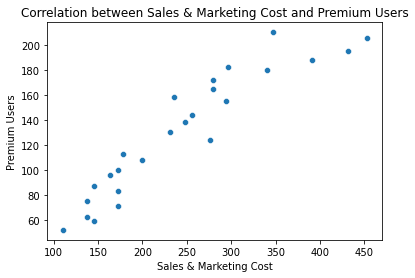

In [15]:
#code to answer Q2 :
#cod for the plot

#Plot the correlation between sales & marketing cost and premium users using seaborn.
#We use a scatterplot to demonstrate the relationship between two quantative variables.
sns.scatterplot(x='Sales and Marketing Cost', y='Premium MAUs', data=spotify)
plt.xlabel('Sales & Marketing Cost')
plt.ylabel('Premium Users')
plt.title('Correlation between Sales & Marketing Cost and Premium Users')
plt.show()

### It seems that there is a positive linear correlation between Sales & Marketing Cost and Premium Users